In [1]:
import pandas as pd
import glob
import numpy as np
import pickle as pkl
from tqdm import tqdm
import matplotlib.pyplot as plt

# gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.models import LdaModel
from gensim.models.ldamulticore import LdaMulticore

In [2]:
# load raw corpus dataframe
with open('data/raw_corpus.pkl', 'rb') as f:
    corpus_df = pkl.load(f)
    
# load cleaned corpus
with open('data/cleaned_corpus.pkl', 'rb') as f:
    corpus = pkl.load(f)

In [3]:
nTopics = 17

In [4]:
# load model
fname = f'trained_models/trained_lda_model_{nTopics}'
lda_model = LdaModel.load(fname)

#load topic probabilities for each paper
topic_distributions = np.load(f'data/topic_distributions_{lda_model.num_topics}.npy')

In [5]:
corpus_df 

,DOI,Year,Journal,Title,Abstract,Affiliation
0,10.1029/91WR01996,1991,Water Resour. Res.,WEIGHTED SUM TRANSFERABLE DISCHARGE PERMIT PRO...,Transferable discharge permit (TDP) programs f...,CANADA
1,10.1029/91WR00590,1991,Water Resour. Res.,RELIABILITY IMPROVEMENTS IN DESIGN OF WATER DI...,Water distribution networks can fail either by...,CANADA
2,10.1029/91WR02077,1991,Water Resour. Res.,A NOTE ON FRACTAL CHANNEL NETWORKS,This paper studies the relation between the st...,ITALY
3,10.1029/91WR01990,1991,Water Resour. Res.,EFFECTS OF SOIL HETEROGENEITY ON PESTICIDE LEA...,Pesticide leaching was simulated numerically a...,NETHERLANDS
4,10.1029/91WR02025,1991,Water Resour. Res.,EFFECT OF CATCHMENT-SCALE SUBSURFACE MIXING ON...,A 3.8-ha watershed on the west coast of New Ze...,USA
5,10.1029/91WR02028,1991,Water Resour. Res.,A MODEL FOR SIMULATING TRANSPORT OF REACTIVE M...,This paper presents the development and demons...,USA
6,10.1029/91WR02270,1991,Water Resour. Res.,TRACER TRANSPORT IN FRACTURES - ANALYSIS OF FI...,A variable-aperture channel model is used as t...,USA
7,10.1029/91WR01405,1991,Water Resour. Res.,A LARGE-SCALE FLOW AND TRACER EXPERIMENT IN GR...,This paper describes the Stripa three-dimensio...,SWEDEN
8,10.1029/91WR01404,1991,Water Resour. Res.,A LARGE-SCALE FLOW AND TRACER EXPERIMENT IN GR...,Water and tracer flow has been monitored in a ...,SWEDEN
9,10.1029/91WR02026,1991,Water Resour. Res.,HYDROLOGIC APPLICATIONS OF THE CONNECTION MACH...,Massively parallel computers will play an incr...,USA


In [6]:
# get a list of all journals
journals = corpus_df.Journal.unique()
journals

array(['Water Resour. Res.', 'Hydrol. Process.',
       'Hydrol. Sci. J.-J. Sci. Hydrol.', 'J. Hydrometeorol.',
       'J. Hydrol.', 'Adv. Water Resour.', 'Hydrol. Earth Syst. Sci.'],
      dtype=object)

In [7]:
# count papers in years
nyear = {}
for y, year in enumerate(corpus_df.Year.unique()):
    nyear[year] = corpus_df.loc[corpus_df.Year == year].shape[0]
sorted(nyear.items())

[('1991', 633),
 ('1992', 667),
 ('1993', 737),
 ('1994', 683),
 ('1995', 987),
 ('1996', 840),
 ('1997', 910),
 ('1998', 872),
 ('1999', 953),
 ('2000', 1010),
 ('2001', 992),
 ('2002', 1135),
 ('2003', 1223),
 ('2004', 1333),
 ('2005', 1226),
 ('2006', 1617),
 ('2007', 1782),
 ('2008', 1837),
 ('2009', 1815),
 ('2010', 1843),
 ('2011', 1953),
 ('2012', 2270),
 ('2013', 2428),
 ('2014', 2718),
 ('2015', 2593),
 ('2016', 2617),
 ('2017', 2663),
 ('2018', 2626),
 ('2019', 2723)]

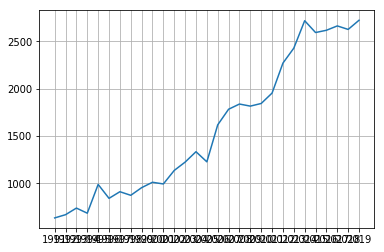

In [8]:
x,y = zip(*sorted(nyear.items()))
plt.plot(x,y)
plt.grid()
plt.show()

In [9]:
# run the model
doc_lda = lda_model[corpus]

In [10]:
# create time series

# all years where we have data
years = np.unique(corpus_df['Year'])

# init storage (as a dictionary)
popularity_all_journals = {}
popularity_by_journal = np.zeros([len(corpus_df.Journal.unique()), len(years), lda_model.num_topics])

# loop through years
for y, year in enumerate(years):
    
    # extract all papers in this year
    topic_distributions_year = topic_distributions[corpus_df['Year'] == year,:]

    # calculate topic popularity for this year
    popularity_all_journals[year] = np.sum(topic_distributions_year, axis=0) / np.sum(topic_distributions_year)
    
    # topic popularity by journal
    for j, journal in enumerate(corpus_df.Journal.unique()):
        jyidx = np.where(np.logical_and((corpus_df.Journal == journal), (corpus_df.Year == year)))[0]
        popularity_by_journal[j,y,:] = np.sum(topic_distributions[jyidx,:], axis=0) / np.sum(topic_distributions[jyidx,:])

/home/mashrekur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


In [11]:
def calc_entropy(pmf):
    return -np.nansum(pmf * np.log(pmf))

In [12]:
# calculate entropy 
entropy_by_journal = np.full([len(corpus_df.Journal.unique()), len(years)], np.nan)
for y, year in enumerate(years):
    for j, journal in enumerate(journals):
        entropy_by_journal[j,y] = calc_entropy(popularity_by_journal[j,y,:])

In [13]:
x,y = zip(*sorted(entropy_all_journals.items()))
plt.plot(x,y)
plt.grid()
plt.show()

NameError: name 'entropy_all_journals' is not defined

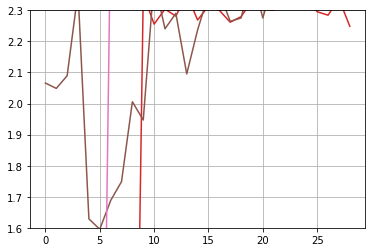

In [14]:
plt.plot(np.transpose(entropy_by_journal))
plt.grid()
plt.ylim([1.6,2.3])
plt.show()

In [15]:
entropy_year_journal = entropy(hm)
entropy_year_journal

NameError: name 'entropy' is not defined

In [16]:
#Popularity of topics by journal plot

In [17]:
def calc_KL_divergence(pmf1,pmf2):
    return -np.nansum(pmf1 * np.log(pmf2/pmf1))

In [18]:
def jensen_shannon_distance(pmf1,pmf2):
    M=0.5*(pmf1+pmf2)
    D1=calc_KL_divergence(pmf1,M)
    D2=calc_KL_divergence(pmf2,M)
    JSDiv = 0.5*D1+0.5*D2
    JSD = np.sqrt(JSDiv)
    return JSD

In [19]:
journals = corpus_df['Journal'].unique()
years = corpus_df['Year'].unique()
njournals = len(journals)
nyears = len(years)

In [20]:
# calculate JSD 
JSD_across_journals = np.full([njournals,njournals,nyears], np.nan)
year_label = []
for y, year in enumerate(years):
    year_label.append(year)
    for j1, journal1 in enumerate(journals):
        for j2, journal2 in enumerate(journals):
            JSD_across_journals[j1,j2,y] = jensen_shannon_distance(popularity_by_journal[j1,y,:],popularity_by_journal[j2,y,:])

IndexError: index 7 is out of bounds for axis 0 with size 7

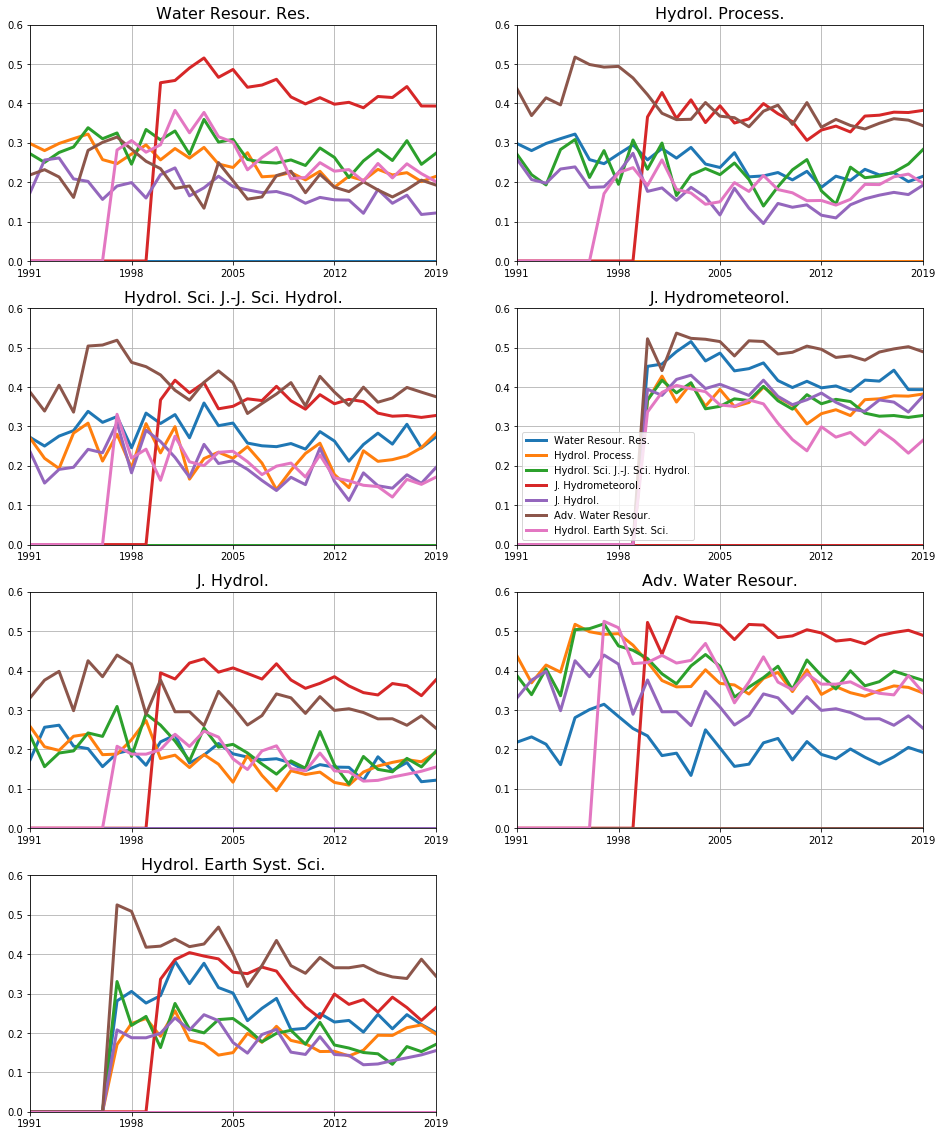

In [24]:
#plot JSD for each journal 
fig, axes = plt.subplots(4,2,figsize=(16,20))

for i, ax in enumerate(axes.flatten()):
    if i==7:
        ax.set_visible(False)
    ax.plot(np.sort(years), JSD_across_journals[i,:,:].transpose(),linewidth=3)
    ax.set_title(journals[i], fontsize=16)
    ax.set_ylim([0.0, 0.6])
    ax.set_xlim([0, 28])
    ax.set_xticks(np.floor(np.linspace(0,nyears-1,5)))
    if i==3:
        ax.legend(journals)
    ax.grid()   

IndexError: index 29 is out of bounds for axis 2 with size 29

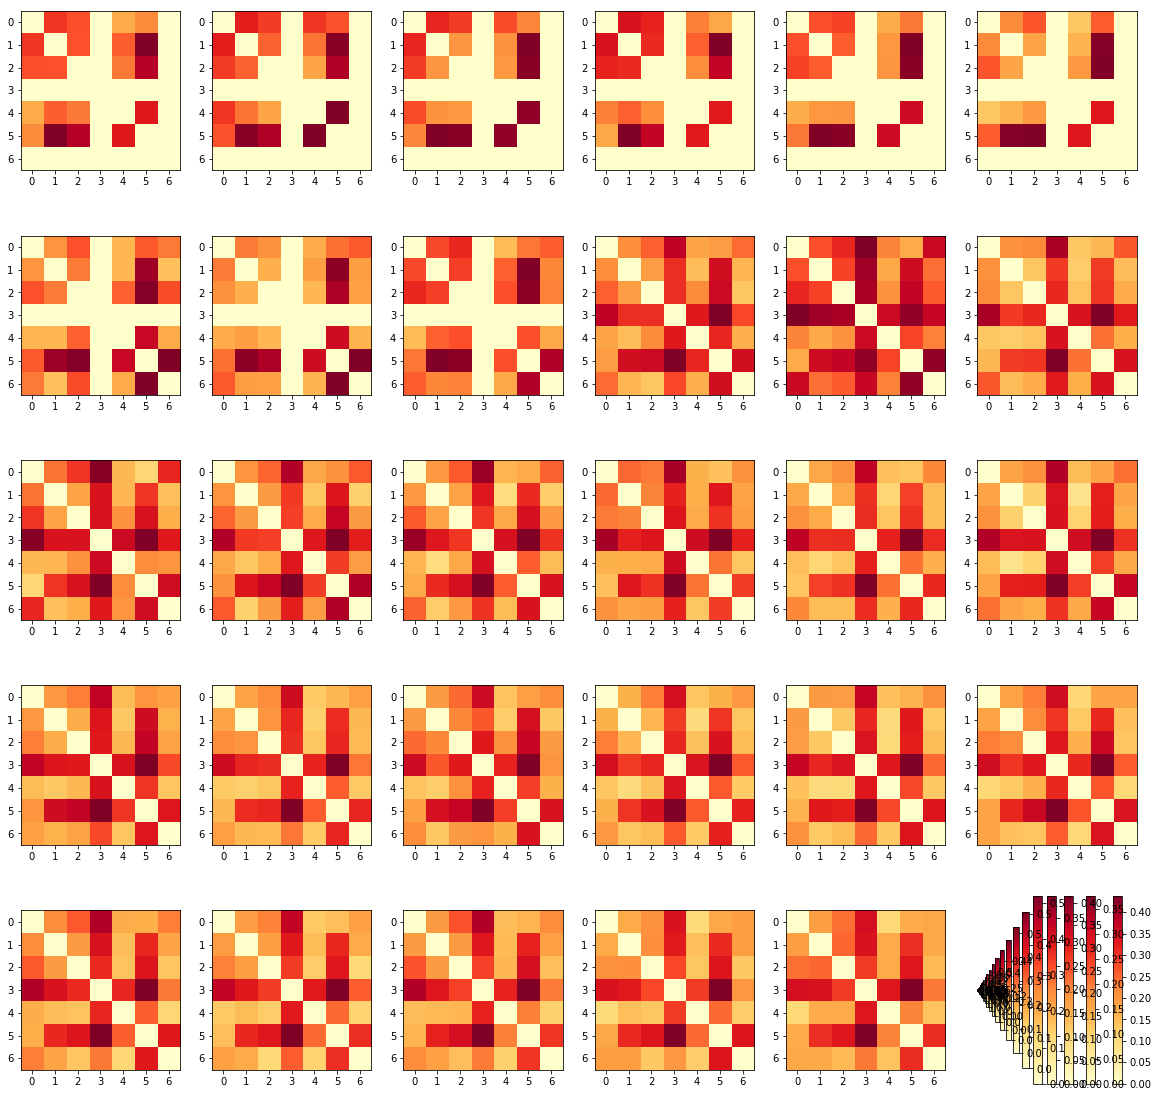

In [77]:
#plot confusion matrices for JSD over all years
fig, axes = plt.subplots(5,6, figsize=(20,20))
for y, ax in enumerate(axes.flatten()):
    if y==29:
        ax.set_visible(False)
    conf_arr = np.array(JSD_across_journals[:,:,y])
    ax.set_aspect(1)
    
    res = ax.imshow(np.array(conf_arr), cmap="YlOrRd", interpolation='nearest')
    plt.colorbar(res)
    width = njournals
    height = njournals
    ax.set_xticks(range(width))#, alphabet[:width]
    ax.set_yticks(range(height))#, alphabet[:height])
plt.show()
plt.close()
# plt.savefig('confusion_matrix.png', format='png')

In [37]:
y

28

In [ ]:
#Spatial Distribution of Topica

#papers in countries
countries = corpus_df.Affiliation.unique()
countries

In [ ]:
# countries
countries = np.unique(corpus_df['Affiliation'])
    
#init storage 
popularity_all_countries = {}
popularity_by_countries = np.zeros([len(corpus_df.Affiliation.uniqe()), len(years), lda_model.num_topics])


# loop through years
for y, year in enumerate(years):
    
    # extract all papers in this year
    topic_distributions_year = topic_distributions[corpus_df['Year'] == year,:]

    # calculate topic popularity for this year
    popularity_all_journals[year] = np.sum(topic_distributions_year, axis=0) / np.sum(topic_distributions_year)
    
    # topic popularity by country
    for c, countries in enumerate(corpus_df.Affiliation.unique()):
        cyidx = np.where(np.logical_and((corpus_df.Affiliation == country), (corpus_df.Year == year)))[0]
        popularity_by_countries[c,y,:] = np.sum(topic_distributions[cyidx,:], axis=0) / np.sum(topic_distributions[cyidx,:])